# Fit bmimpf6 data

EoS: PR

Parameter T dependence: Constant

N (total fitting parameters): 2

## Import Functions

In [1]:
import idaes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

import sys
sys.path.append('../../')

from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)
from pyomo.opt import TerminationCondition, SolverStatus

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom

# parmest (binary_param2)
from bip_fitting_functions import constant

import scipy.stats as stats

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches

## Load Data

In [2]:
data_full = pd.read_csv('r125_bmimpf6_full.csv')
data_subset = pd.read_csv('r125_bmimpf6_subset.csv')

In [3]:
data_full

,temperature,pressure,x_R125,x_bmimpf6
0,283.1,9900,0.013,0.987
1,283.2,99600,0.034,0.966
2,283.3,199600,0.075,0.925
3,283.2,299600,0.126,0.874
4,283.3,399600,0.185,0.815
5,283.1,499700,0.255,0.745
6,283.2,599700,0.342,0.658
7,283.1,699600,0.462,0.538
8,283.2,799800,0.660,0.340
9,298.2,9800,0.003,0.997


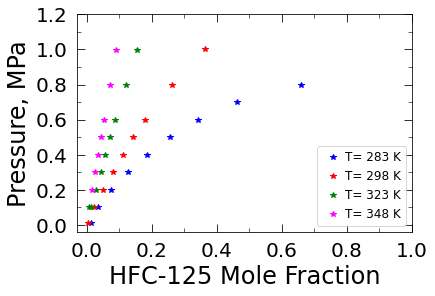

In [4]:
fig, ax = plt.subplots()

ax.plot(data_full["x_R125"][:9],data_full["pressure"][:9]/1e6,"*",color='blue',label="T= 283 K")
ax.plot(data_full["x_R125"][9:18],data_full["pressure"][9:18]/1e6,"*",color='red',label="T= 298 K")
ax.plot(data_full["x_R125"][18:27],data_full["pressure"][18:27]/1e6,"*",color='green',label="T= 323 K")
ax.plot(data_full["x_R125"][27:],data_full["pressure"][27:]/1e6,"*",color='magenta',label="T= 348 K")

# plt.title('Isotherm R32-[emim][TF2N]')
ax.set_ylabel('Pressure, MPa',fontsize=24)
ax.set_xlabel('HFC-125 Mole Fraction',fontsize=24)

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9],minor=True)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1],minor=True)

ax.tick_params("both", direction="in", which="both", length=4, labelsize=20, pad=10)
ax.tick_params("both", which="major", length=8)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.legend(fontsize=12, handletextpad=0.00, loc="lower right")#, bbox_to_anchor=(1, 0.5))
fig.savefig('R125-bmimpf6-data.pdf',bbox_inches='tight')
plt.show()

## Load Configuration + Check DOF

In [5]:
from hfc125_bmimpf6_PR import configuration 

In [6]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

The initial DOF is 7


## Fit Parameters

In [9]:
parameters, obj_value, a = constant(data_subset, configuration, 'R125', 'bmimpf6', "x_R125", "x_bmimpf6", 
    init_temp =  298.15, init_press =   399400 , init_x_c1 =    0.417, init_x_c2 = 0.583,
    init_kappa_A_2_1 = 0.0186, init_kappa_A_1_2 = 0.0077, eps = 0.1, scaling_fac = 1e-9 , read=False)

0    99600.0
Name: pressure, dtype: float64
2022-04-25 08:47:16 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-25 08:47:16 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:16 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-25 08:47:17 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:17 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
1    199600.0
Name: pressure, dtype: float64
2022-04-25 08:47:17 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-25 08:47:17 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:17 [INFO] idaes.init.fs.stat

2022-04-25 08:47:21 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:21 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
12    499500.0
Name: pressure, dtype: float64
2022-04-25 08:47:21 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-25 08:47:22 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:22 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-25 08:47:22 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:22 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:22 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
13    599500.0
Name: pressure, dtype: float64
2022-04-25 

2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
24    99700.0
Name: pressure, dtype: float64
2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-25 08:47:26 [INFO] idaes.init.fs.state_block: Property ini

   3  3.1076307e+00 2.61e-01 5.88e+05  -1.0 7.26e+04    -  6.55e-02 2.47e-01h  3
   4  3.5878449e+00 1.98e-01 3.43e+05  -1.0 5.98e+04  -4.0 6.72e-01 2.24e-01h  3
   5  3.6922026e+00 1.85e-01 3.15e+05  -1.0 5.04e+04  -4.5 8.62e-01 6.19e-02h  5
   6  3.7147672e+00 1.82e-01 3.09e+05  -1.0 5.57e+04  -5.0 8.73e-01 1.55e-02h  7
   7  3.7149502e+00 1.82e-01 3.09e+05  -1.0 9.52e+04  -5.4 9.56e-01 2.26e-04h 13
   8  3.7151213e+00 1.82e-01 3.09e+05  -1.0 5.62e+04  -5.0 9.16e-01 1.21e-04h 14
   9  3.7151379e+00 1.82e-01 3.09e+05  -1.0 1.08e+05  -5.5 9.90e-01 2.70e-05h 16
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  3.7151588e+00 1.82e-01 3.09e+05  -1.0 5.83e+04  -5.1 8.80e-01 1.51e-05h 17
  11r 3.7151588e+00 1.82e-01 9.99e+02  -0.7 0.00e+00  -5.5 0.00e+00 3.96e-07R 22
  12r 3.7162774e+00 7.95e+00 9.96e+02  -0.7 4.33e+04    -  4.75e-03 3.00e-03f  1
  13r 3.7166602e+00 7.94e+00 9.95e+02  -0.7 1.39e+04    -  1.51e-03 1.35e-03f  1
  14r 3.7172086e+00 7.92e+00

/Users/bridgettebefort/opt/anaconda3/envs/idaes-pse-dev/lib/python3.9/site-packages/pyomo/contrib/interior_point/interface.py:418: RuntimeWarning: divide by zero encountered in true_divide
  data = (duals_primals_lb/(primals - self._nlp.primals_lb()) +


In [10]:
print('Objective (SSE):',obj_value)

Objective (SSE): 17.360265311706744


In [11]:
cov = np.array(a)
print('Covariance Matrix:')
print(cov)

Covariance Matrix:
[[ 1.10428973e-03 -8.24020412e-05]
 [-8.24020412e-05  6.12298751e-06]]


In [12]:
np.savetxt('Data/Covariance/PR_Cov_2parameter.csv',cov,delimiter=',')

## Apply Parameters + Plot

In [13]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [ ]:
# m = ConcreteModel()

# m.fs = FlowsheetBlock(default={"dynamic": False})

# m.fs.properties = GenericParameterBlock(default=configuration)

# m.fs.F101 = Flash(default={"property_package": m.fs.properties,
#                            "has_heat_transfer": True,
#                            "has_pressure_change": True})

# m.fs.F101.inlet.flow_mol.fix(1)
# m.fs.F101.inlet.temperature.fix(323.15)
# m.fs.F101.inlet.pressure.fix(399800)
# m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.5)

# m.fs.properties.PR_kappa_A['R125','bmimpf6'] = parameters['fs.properties.PR_kappa_A[R125,bmimpf6]']
# m.fs.properties.PR_kappa_A['bmimpf6','R125'] = parameters['fs.properties.PR_kappa_A[bmimpf6,R125]']

# # Initialize the flash unit
# m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# # Fix the state variables on the state block
# # m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'bmimpf6'].unfix()

# R125_x = np.zeros((len(data_full)))
# P = np.zeros((len(data_full)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "bmimpf6"] == m.fs.liq)

# for i in range(len(data_full)):
#     m.fs.liq = data_full["x_bmimpf6"].iloc[i]
#     m.fs.F101.inlet.temperature.fix(float(data_full["temperature"].iloc[i]))
#     m.fs.F101.inlet.pressure.fix(float(data_full["pressure"].iloc[i]))
#     m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data_full["x_R125"].iloc[i])+0.1)
#     m.fs.F101.inlet.mole_frac_comp[0,'bmimpf6'].fix(float(1-(data_full["x_R125"].iloc[i]+0.1)))
#     m.fs.F101.vap_outlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    
# #     DOF_final = degrees_of_freedom(m)
# #     print("The final DOF is {0}".format(DOF_final))
#     m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
#     status = solver.solve(m, tee = False)

# #     m.fs.F101.report()
#     if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
#         print(data_full["x_bmimpf6"].iloc[i])
#         R125_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R125']) 
#         P[i] = value(m.fs.F101.vap_outlet.pressure[0])

#     else:
#         print('Infeasible.')

In [14]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.5)

m.fs.properties.PR_kappa_A['R125','bmimpf6'] = parameters['fs.properties.PR_kappa_A[R125,bmimpf6]']
m.fs.properties.PR_kappa_A['bmimpf6','R125'] = parameters['fs.properties.PR_kappa_A[bmimpf6,R125]']

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'bmimpf6'].unfix()

R125_x = np.zeros((len(data_full)))
P = np.zeros((len(data_full)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "bmimpf6"] == m.fs.liq)

for i in range(len(data_subset)):
    m.fs.liq = data_subset["x_bmimpf6"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data_subset["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_subset["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data_subset["x_R125"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'bmimpf6'].fix(float(1-(data_subset["x_R125"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_subset["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
        print(data_subset["x_bmimpf6"].iloc[i])
        R125_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R125']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')

0.966
0.925
0.874
0.815
0.745
0.658
0.538


InitializationError: fs.F101.control_volume.properties_in failed to initialize successfully. Please check the output logs for more information.

In [ ]:
fitted_data = pd.DataFrame(data=[R125_x,P/1e6])
fitted_data = fitted_data.T
fitted_data.columns = ['R125_x','P, MPa']
fitted_data.to_csv('Data/Fits/PR_FittedData_2parameter.csv')

In [ ]:
P1= np.zeros((len(P)))

for i in range(len(P)):
    P1[i] = P[i]/1e6

fig, ax = plt.subplots()

ax.plot(R125_x[0:9],P1[0:9],"b*-",label="T= 283 K")  
ax.plot(R125_x[9:18],P1[9:18],"r*-",label="T= 298 K") 
ax.plot(R125_x[18:27],P1[18:27],"c*-",label="T= 323 K") 
ax.plot(R125_x[27:],P1[27:],"m-*",label="T= 348 K")
ax.plot(data_full["x_R125"],data_full["pressure"]/1e6,"*",color='orange',label="data")  

# plt.title('Isotherm R32-[emim][TF2N]')
ax.set_ylabel('Pressure, MPa',fontsize=24)
ax.set_xlabel('HFC-125 Mole Fraction',fontsize=24)

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9],minor=True)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1],minor=True)

ax.tick_params("both", direction="in", which="both", length=4, labelsize=20, pad=10)
ax.tick_params("both", which="major", length=8)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.legend(fontsize=12, handletextpad=0.00, loc="lower right")#, bbox_to_anchor=(1, 0.5))
fig.savefig('R125-emimTF2N-noTdep.pdf',bbox_inches='tight')
plt.show()

In [ ]:
def make_ellipse(mu, cov, ci=0.95):
    e, v = np.linalg.eig(cov)
  
    alpha = np.arctan(v[0,1]/v[0,0])
    angle = -alpha*180/np.pi 
    q = stats.chi2(2).ppf(ci)
    e = Ellipse(mu, 2*np.sqrt(q*e[0]), 2*np.sqrt(q*e[1]), angle=angle)
    return e

In [ ]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14

mu = parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'], parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']

e = make_ellipse(mu, cov, ci=0.95)

e.set_alpha(0.25)
e.set_facecolor('black')
e.set_zorder(10)

ax = plt.subplot()

ax.add_artist(e)
ax.scatter(parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],parameters['fs.properties.PR_kappa_A[emimTf2N,R32]'],c='black',label='Reported Parameter Values')

# plt.title('95% confidence ellipse')
plt.xlabel("$\kappa_{21}$")
plt.ylabel("$\kappa_{12}$")

# patch = mpatches.Patch(color='blue', label='Frequentist approach',alpha=1)

# plt.legend(handles=[patch])
plt.legend()
ax.set(xlim=[-0.021, -0.02], ylim=[-0.03, -0.028])
# plt.savefig('R32_hmimCl_ellipse.png')
plt.show()

In [ ]:
## Why is the covariance matrix not printing on plot??

### Print Eigvals, Eigvectors of Covariance

An identifiability analysis can be performed with these as well as a FIM because the covariance matrix is the inverse of the FIM. That means that if there are any eigvals >> 0, their eigvecs indicate directions of un-identifiability.

In [ ]:
eigvals, eigvecs = np.linalg.eig(cov)

In [ ]:
eigvals

In [ ]:
eigvecs

In [ ]:
np.savetxt('Data/EigenAnalysis/PR_vals_2parameter.csv',eigvals,delimiter=',')
np.savetxt('Data/EigenAnalysis/PR_vecs_2parameter.csv',eigvecs,delimiter=',')

Conclusion: Fully identifiable because all eigvals ~ 0 

## FIM with Enthalpy of Vaporization (and Pressure)

### Step 1: Perturb Parameters, Calculate Enthalpy of Vaporization

1. Perturb Parameters: stepsize = 0.001

2. Holding all other parameters constant, calculate new pressure predictions at different temps, compositions 

*T = (T1=298, T2=323)

*x = (0.01,0.2,0.325,0.4)

*Pguess comes from data_full

3. Save P, Use Clausius Clapeyron to calculate enthvap

In [ ]:
h = 0.001
kR32_emimTF2N_plus = parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'] + h
kR32_emimTF2N_minus = parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'] - h
kemimTF2N_R32_plus = parameters['fs.properties.PR_kappa_A[emimTf2N,R32]'] + h
kemimTF2N_R32_minus = parameters['fs.properties.PR_kappa_A[emimTf2N,R32]'] - h

In [ ]:
data = np.array([[kR32_emimTF2N_plus,parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']],
                [kR32_emimTF2N_minus,parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']],
                [parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],kemimTF2N_R32_plus],
               [parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],kemimTF2N_R32_minus]])

In [ ]:
perturbed_params = pd.DataFrame(data=data,columns=['kR32_emimTF2N','kemimTF2N_R32'])
perturbed_params

In [ ]:
x = [0.01,0.2,0.325,0.4]
temps_298 = [298.15,298.15,298.15,298.15]
pguess_298 = [9600,250000,399400,549000]
temps_323 = [323.15,323.15,323.15,323.15]
pguess_323 = [20400,400100,700300,1000000]

In [ ]:
test_298 = pd.DataFrame()
test_298['temperature'] = temps_298
test_298['pressure'] = pguess_298
test_298['x_R32'] = x
test_298['x_emimTf2N'] = 1-test_298['x_R32']
# test_298

In [ ]:
test_323 = pd.DataFrame()
test_323['temperature'] = temps_323
test_323['pressure'] = pguess_323
test_323['x_R32'] = x
test_323['x_emimTf2N'] = 1-test_323['x_R32']
# test_323

In [ ]:
test_data = pd.concat([test_298,test_323],ignore_index=True)

In [ ]:
# Loop through test values

R32_x = np.zeros((len(perturbed_params),len(test_data)))
P = np.zeros((len(perturbed_params),len(test_data)))

for j in range(len(perturbed_params)):

    m = ConcreteModel()

    m.fs = FlowsheetBlock(default={"dynamic": False})

    m.fs.properties = GenericParameterBlock(default=configuration)

    m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                               "has_heat_transfer": True,
                               "has_pressure_change": True})

    m.fs.F101.inlet.flow_mol.fix(1)
    m.fs.F101.inlet.temperature.fix(323.15)
    m.fs.F101.inlet.pressure.fix(399800)
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

    m.fs.properties.PR_kappa_A['R32','emimTf2N'] = perturbed_params['kR32_emimTF2N'][j]
    m.fs.properties.PR_kappa_A['emimTf2N','R32'] = perturbed_params['kemimTF2N_R32'][j]

    # Initialize the flash unit
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

    # Fix the state variables on the state block
    # m.fs.F101.inlet.pressure.unfix()
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

    m.fs.liq = Param(mutable=True,default=0.040)
    m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

    for i in range(len(test_data)):
        m.fs.liq = test_data["x_emimTf2N"].iloc[i]
        m.fs.F101.inlet.temperature.fix(float(test_data["temperature"].iloc[i]))
        m.fs.F101.inlet.pressure.fix(float(test_data["pressure"].iloc[i]))
        m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(test_data["x_R32"].iloc[i])+0.1)
        m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(test_data["x_R32"].iloc[i]+0.1)))
        m.fs.F101.vap_outlet.temperature.fix(float(test_data["temperature"].iloc[i]))

    #     DOF_final = degrees_of_freedom(m)
    #     print("The final DOF is {0}".format(DOF_final))
        m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

        status = solver.solve(m, tee = False)

    #     m.fs.F101.report()
        if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
            print(test_data["x_emimTf2N"].iloc[i])
            R32_x[j,i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32'])
            P[j,i] = value(m.fs.F101.vap_outlet.pressure[0])

        else:
            print('Infeasible.')

In [ ]:
test_data['P_kR32_emimTF2N_plus'] = P[0]
test_data['P_kR32_emimTF2N_minus'] = P[1]
test_data['P_kemimTF2N_R32_plus'] = P[2]
test_data['P_kemimTF2N_R32_minus'] = P[3]

In [ ]:
grad_P = test_data

In [ ]:
test_data_298 = test_data[test_data['temperature']==298.15]
test_data_323 = test_data[test_data['temperature']==323.15].reset_index()

In [ ]:
R = 8.314 #J/mol-K
hvap_calc_kR32_emimTF2N_plus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kR32_emimTF2N_plus'][i]
    P1 = test_data_298['P_kR32_emimTF2N_plus'][i]
    hvap_calc_kR32_emimTF2N_plus.append(np.log(P2/P1)*R/(1/T2-1/T1))

hvap_calc_kR32_emimTF2N_minus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kR32_emimTF2N_minus'][i]
    P1 = test_data_298['P_kR32_emimTF2N_minus'][i]
    hvap_calc_kR32_emimTF2N_minus.append(np.log(P2/P1)*R/(1/T2-1/T1))
    
hvap_calc_kemimTF2N_R32_plus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kemimTF2N_R32_plus'][i]
    P1 = test_data_298['P_kemimTF2N_R32_plus'][i]
    hvap_calc_kemimTF2N_R32_plus.append(np.log(P2/P1)*R/(1/T2-1/T1))
    
hvap_calc_kemimTF2N_R32_minus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kemimTF2N_R32_minus'][i]
    P1 = test_data_298['P_kemimTF2N_R32_minus'][i]
    hvap_calc_kemimTF2N_R32_minus.append(np.log(P2/P1)*R/(1/T2-1/T1))

In [ ]:
hvap = pd.DataFrame()
hvap['x_R32'] = x
hvap['hvap_kR32_emimTF2N_plus'] = hvap_calc_kR32_emimTF2N_plus
hvap['hvap_kR32_emimTF2N_minus'] = hvap_calc_kR32_emimTF2N_minus
hvap['hvap_kemimTF2N_R32_plus'] = hvap_calc_kemimTF2N_R32_plus
hvap['hvap_kemimTF2N_R32_minus'] = hvap_calc_kemimTF2N_R32_minus

In [ ]:
hvap

### Step 2: Calculate Gradient wrt each param at each concentration

In [ ]:
grad_kR32_emimTF2N = (hvap['hvap_kR32_emimTF2N_plus'] - hvap['hvap_kR32_emimTF2N_minus'])/(2*h)
grad_kemimTF2N_R32 = (hvap['hvap_kemimTF2N_R32_plus'] - hvap['hvap_kemimTF2N_R32_minus'])/(2*h)

In [ ]:
grad_P['kR32_emimTF2N'] = (grad_P['P_kR32_emimTF2N_plus'] - grad_P['P_kR32_emimTF2N_minus'])/(2*h)
grad_P['kemimTF2N_R32'] = (grad_P['P_kemimTF2N_R32_plus'] - grad_P['P_kemimTF2N_R32_minus'])/(2*h)

### Step 3: Build Jacobian and FIM

Rows: enthvap @ 4 concentrations; or pressure @ 4 concentrations, 2 temperatures

Columns: parameters (2)

In [ ]:
J_df = pd.DataFrame()
J_df['kR32_emimTF2N'] = grad_kR32_emimTF2N
J_df['kemimTF2N_R32'] = grad_kemimTF2N_R32

In [ ]:
J = J_df.to_numpy()
Jtrans = np.transpose(J)

In [ ]:
FIM = np.dot(Jtrans,J)

In [ ]:
FIM

In [ ]:
J_df_P = pd.DataFrame()
J_df_P['kR32_emimTF2N'] = grad_P['kR32_emimTF2N']
J_df_P['kemimTF2N_R32'] = grad_P['kemimTF2N_R32']

In [ ]:
J_P = J_df_P.to_numpy()
J_Ptrans = np.transpose(J_P)

In [ ]:
FIM_P = np.dot(J_Ptrans,J_P)

In [ ]:
FIM_P

### Step 4: Find Eigenvalues, Eigenvectors

**Enthalpy of Vaporization**

In [ ]:
eigvals, eigvecs = np.linalg.eig(FIM)

In [ ]:
eigvals

In [ ]:
eigvecs

All eigenvalues >> 0, assuming that these 2 parameters are identifiable with the given T, x, P data

**Pressure**

In [ ]:
eigvals_P, eigvecs_P = np.linalg.eig(FIM_P)

In [ ]:
eigvals_P

In [ ]:
eigvecs_P

All eigvals >> 0, assuming these 2 parameters are identifiable with the given T, x, P data

## AIC Value

See https://docs.google.com/document/d/1um0r2XK4ldjjy2colOqaZsEM3wIzGD6l_3B8gnpnI2I/edit# for equations

### Calculate MLE

In [ ]:
### Define calc model P function

def calcPmod(theta,data):
    '''
    Arguments:
    theta - list of BIPs
    data - data needed to run the model
    
    Returns
    Pmod - list of calculated pressures
    '''
    
    m = ConcreteModel()

    m.fs = FlowsheetBlock(default={"dynamic": False})

    m.fs.properties = GenericParameterBlock(default=configuration)

    m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                               "has_heat_transfer": True,
                               "has_pressure_change": True})

    m.fs.F101.inlet.flow_mol.fix(1)
    m.fs.F101.inlet.temperature.fix(323.15)
    m.fs.F101.inlet.pressure.fix(399800)
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

    m.fs.properties.PR_kappa_A['R32','emimTf2N'] = theta[0]
    m.fs.properties.PR_kappa_A['emimTf2N','R32'] = theta[1]

    # Initialize the flash unit
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

    # Fix the state variables on the state block
    # m.fs.F101.inlet.pressure.unfix()
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

    R32_x = np.zeros((len(data)))
    P = np.zeros((len(data)))

    m.fs.liq = Param(mutable=True,default=0.040)
    m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

    for i in range(len(data)):
        m.fs.liq = data["x_emimTf2N"].iloc[i]
        m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
        m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
        m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i])+0.1)
        m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data["x_R32"].iloc[i]+0.1)))
        m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))

    #     DOF_final = degrees_of_freedom(m)
    #     print("The final DOF is {0}".format(DOF_final))
        m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

        status = solver.solve(m, tee = False)

    #     m.fs.F101.report()
        if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
#             print(data["x_emimTf2N"].iloc[i])
            R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
            P[i] = value(m.fs.F101.vap_outlet.pressure[0])

        else:
            print('Infeasible.')
            
    Pmod = P
    
    return Pmod

In [ ]:
### Define function to calculate residual
def res(theta,data,Pexp):
    '''
    Arguments:
    theta - list of BIPs
    data - data needed to run the model
    Pexp - list of experimental pressure data
    
    Returns:
    residual between model and exp (note, this will be large because of units of P)
    '''
    
    #Calculate model P
    Pmod = calcPmod(theta,data)
    
    return Pexp - Pmod

In [ ]:
theta_guess = [parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']]
Pexp = data_subset['pressure'].values.tolist()
n = 2
bnds = ([-20,-20],[20,20])

In [ ]:
# theta0 = [-0.05,-0.04,-0.03,-0.02,-0.01,-0.001]
# restest = []
# for i in range(len(theta0)):
#     theta_guess = [theta0[i],parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']]
#     restest.append(res(theta_guess,data_subset,Pexp,n))
    
# plt.plot(theta0,restest)
# plt.show()

In [ ]:
### solve
sol = scipy.optimize.least_squares(res, theta_guess, method='trf', args=(data_subset,Pexp),bounds=bnds)

In [ ]:
theta_hat = sol.x
theta_hat

In [ ]:
def SSR(theta,data,Pexp):
    '''
    Arguments:
    theta - list of BIPs
    data - data needed to run the model
    Pexp - list of experimental pressure data
    
    Returns:
    SSR - sum of residuals squared
    '''
    
    #Calculate model P
    Pmod = calcPmod(theta,data)
    
    #Calculate residual squared
    res = (Pexp - Pmod)**2
    
    #Sum residuals squared
    SSR = np.sum(res)
    
    return SSR

In [ ]:
SSR = SSR(theta_hat,data_subset,Pexp)
SSR

In [ ]:
sigma_sq = SSR/n
sigma_sq

In [ ]:
L = -n/2*np.log(2*np.pi) - n/2*np.log(sigma_sq) - 1/(2*sigma_sq)*SSR
L

In [ ]:
AIC = 2*n - 2*L
AIC

Other AIC - using SSR calculated in above parameter fitting

In [ ]:
n=2

In [ ]:
SSR_other = obj_value
SSR_other

In [ ]:
sigma_sq_other = SSR_other/n
sigma_sq_other

In [ ]:
L_other = -n/2*np.log(2*np.pi) - n/2*np.log(sigma_sq_other) - 1/(2*sigma_sq_other)*SSR_other
L_other

In [ ]:
AIC_other = 2*n - 2*L_other
AIC_other

In [ ]:
AIC_data = pd.DataFrame(data=[n,obj_value,AIC_other])
AIC_data = AIC_data.T
AIC_data.columns = ['n','Objective, Pa^2','AIC']
AIC_data.to_csv('Data/AIC/PR_AIC_2parameter.csv')